# Do clouds of similar size cluster?
This notebook is to explores the preprocessed fields

In [10]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

pp_fn = '/project/meteo/scratch/S.Rasp/convective_variability_data/preproc_data/variability/all_days_m_50_mems_inc_1h.nc'

In [65]:
rg = nc.Dataset(pp_fn)

In [96]:
# Extract the fields
mean_m = rg.variables['mean_m'][:]
var_m = rg.variables['var_m'][:]
mean_N = rg.variables['mean_N'][:]
mean_M = rg.variables['mean_M'][:]

beta = var_m / (mean_m ** 2)


In [16]:
print(rg.variables['date'][:])
print(rg.variables['time'][:])

[  6.35999904e+10   6.36000768e+10   6.36001632e+10   6.36002496e+10
   6.36003360e+10   6.36004224e+10   6.36005088e+10   6.36005952e+10
   6.36006816e+10   6.36007680e+10   6.36008544e+10   6.36009408e+10]
[  6.   7.   8.   9.  10.  11.  12.  13.  14.  15.  16.  17.  18.  19.  20.
  21.  22.  23.  24.]


## Spatial distribution of mean(m)
Let's now look at the spatial distribution of the mean cloud mass flux

In [89]:

def plot_m_fields(day_ind, time_ind, mean_m, beta, mean_N):
    # Loop over different scales
    for i, i_n in enumerate([6, 3, 0]):
        n = rg.variables['n'][i_n]
        print('Coarsening scale = %0.1f km' % (n * 2.8))

        lim = int(256 / n)
        plot_m = mean_m[day_ind, time_ind, i_n, :lim, :lim]
        plot_beta = beta[day_ind, time_ind, i_n, :lim, :lim]
        plot_N = mean_N[day_ind, time_ind, i_n, :lim, :lim]

        inds = (np.isfinite(plot_beta) * plot_N*50 > 10)
        print('beta = %.2f; beta (only more than 10 clouds) = %.2f; beta (10+ and N weighted) = %.2f' % 
              (np.nanmean(plot_beta), np.average(plot_beta[inds]), np.average(plot_beta[inds], weights=plot_N[inds]))) 

        fig, axarr = plt.subplots(1, 3, figsize=(17, 5))

        im = axarr[0].imshow(plot_m, cmap='rainbow', origin='lower')
        fig.colorbar(im, ax=axarr[0], shrink=0.8)
        axarr[0].set_title('mean(m)')


        im = axarr[1].imshow(plot_beta, cmap='bwr', origin='lower', vmin=0, vmax=2)
        fig.colorbar(im, ax=axarr[1], shrink=0.8)
        axarr[1].set_title('beta')

        im = axarr[2].imshow(plot_N * 50, cmap='rainbow', origin='lower')
        fig.colorbar(im, ax=axarr[2], shrink=0.8)
        axarr[2].set_title('Number of clouds in all 50 mems')
        plt.show()

Coarsening scale = 11.2 km
beta = 0.54; beta (only more than 10 clouds) = 0.70; beta (10+ and N weighted) = 0.71


/home/s/S.Rasp/anaconda2/envs/py_env/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in greater


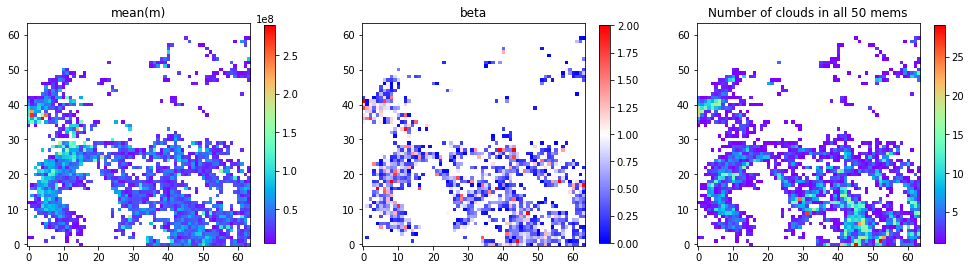

Coarsening scale = 89.6 km
beta = 0.72; beta (only more than 10 clouds) = 0.78; beta (10+ and N weighted) = 0.81


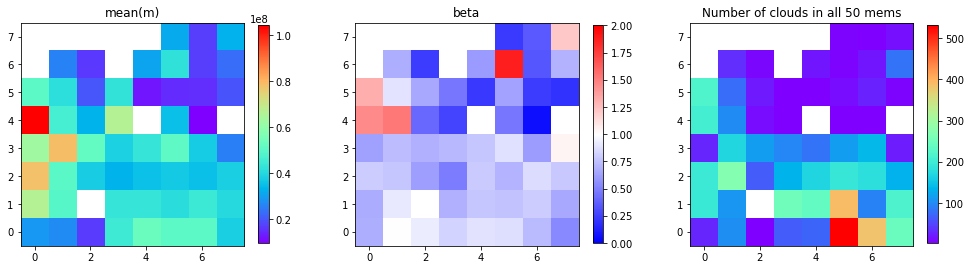

Coarsening scale = 716.8 km
beta = 1.11; beta (only more than 10 clouds) = 1.11; beta (10+ and N weighted) = 1.11


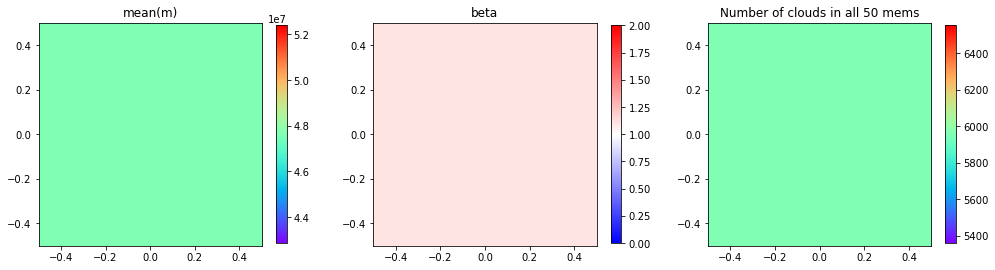

In [90]:
plot_m_fields(7, 10, mean_m, beta, mean_N)

Coarsening scale = 11.2 km
beta = 0.68; beta (only more than 10 clouds) = 0.87; beta (10+ and N weighted) = 0.89


/home/s/S.Rasp/anaconda2/envs/py_env/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in greater


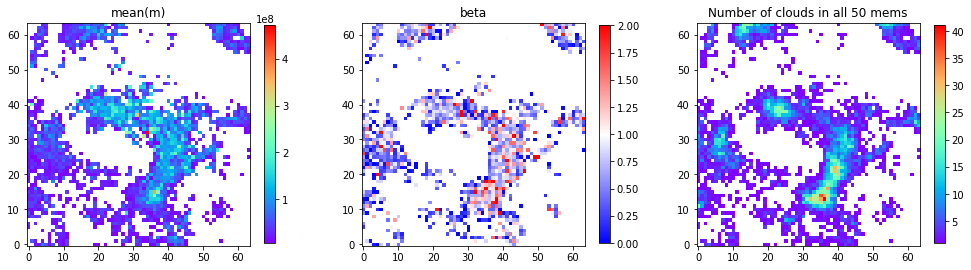

Coarsening scale = 89.6 km
beta = 0.83; beta (only more than 10 clouds) = 0.88; beta (10+ and N weighted) = 1.01


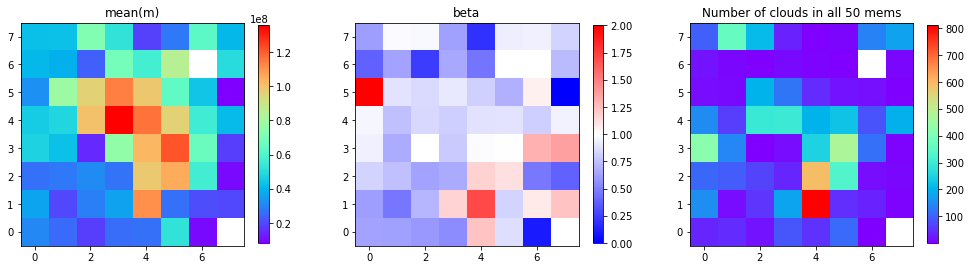

Coarsening scale = 716.8 km
beta = 1.51; beta (only more than 10 clouds) = 1.51; beta (10+ and N weighted) = 1.51


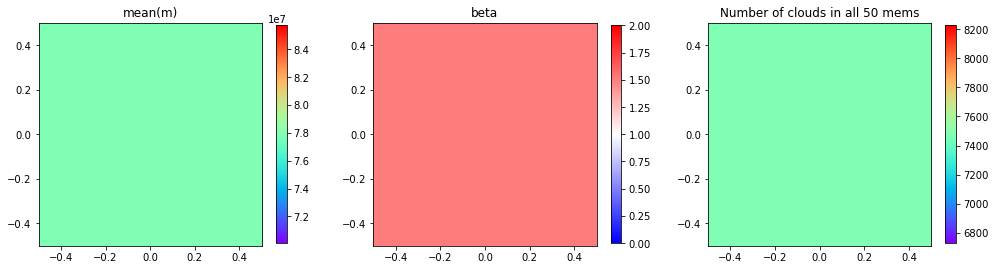

In [91]:
plot_m_fields(1, 15, mean_m, beta, mean_N)

### Some impressions
- There definitely is spatial variability in the mean cloud mass flux
- Most points have a lower beta
- But it's more often the points where there aren't many clouds (or where the clouds are small on average?)
- Weighting the beta average with the cloud number increases the mean beta. Is that fairer? I think that has no basis...
- Then I know that there is a significant sampling effect for less than 10 clouds. If I throw those out, I get even closer to one...

## Correlation between M and m

Scale = 716.8 km; Correlation coefficient = 0.66


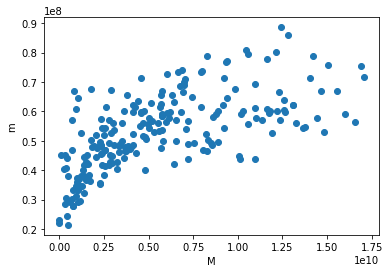

Scale = 358.4 km; Correlation coefficient = 0.61


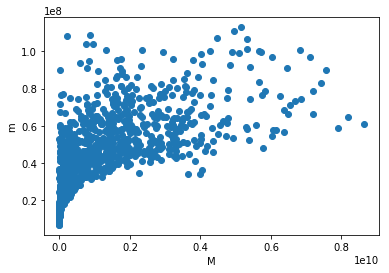

Scale = 179.2 km; Correlation coefficient = 0.65


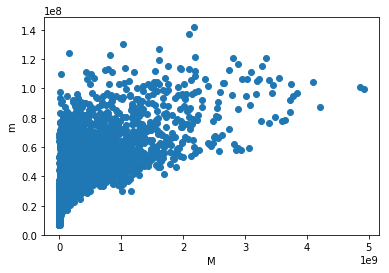

Scale = 89.6 km; Correlation coefficient = 0.61


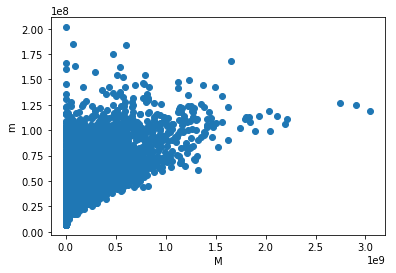

Scale = 44.8 km; Correlation coefficient = 0.57


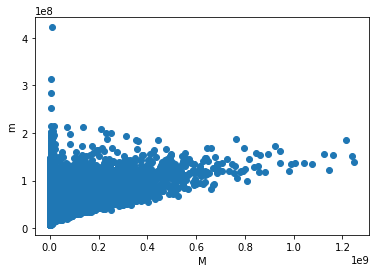

Scale = 22.4 km; Correlation coefficient = 0.53


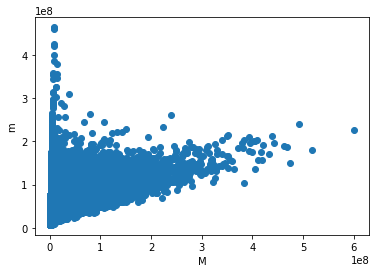

Scale = 11.2 km; Correlation coefficient = 0.52


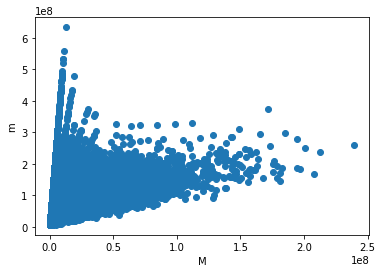

In [103]:
for i_n, n in enumerate(rg.variables['n']):
    all_m = np.ravel(mean_m[:, :, i_n])[np.isfinite(np.ravel(mean_m[:, :, i_n]))]
    all_M = np.ravel(mean_M[:, :, i_n])[np.isfinite(np.ravel(mean_M[:, :, i_n]))]
    print('Scale = %0.1f km; Correlation coefficient = %0.2f' % 
          ((n * 2.8), np.corrcoef(all_m, all_M)[0, 1]))
    plt.scatter(all_M, all_m)
    plt.xlabel('M')
    plt.ylabel('m')
    plt.show()

So it seems there is a relatively strong correlation between the total mass flux and the cloud mass flux at all scales. For the smaller scales, sampling issues produce some strange results...

![title](/home/s/S.Rasp/repositories/convective_variability_analysis/figures/cloud_stats/m_evolution_all-days_50-mems_perim-3_dr-2_var-m_inc-1h_sum.png)

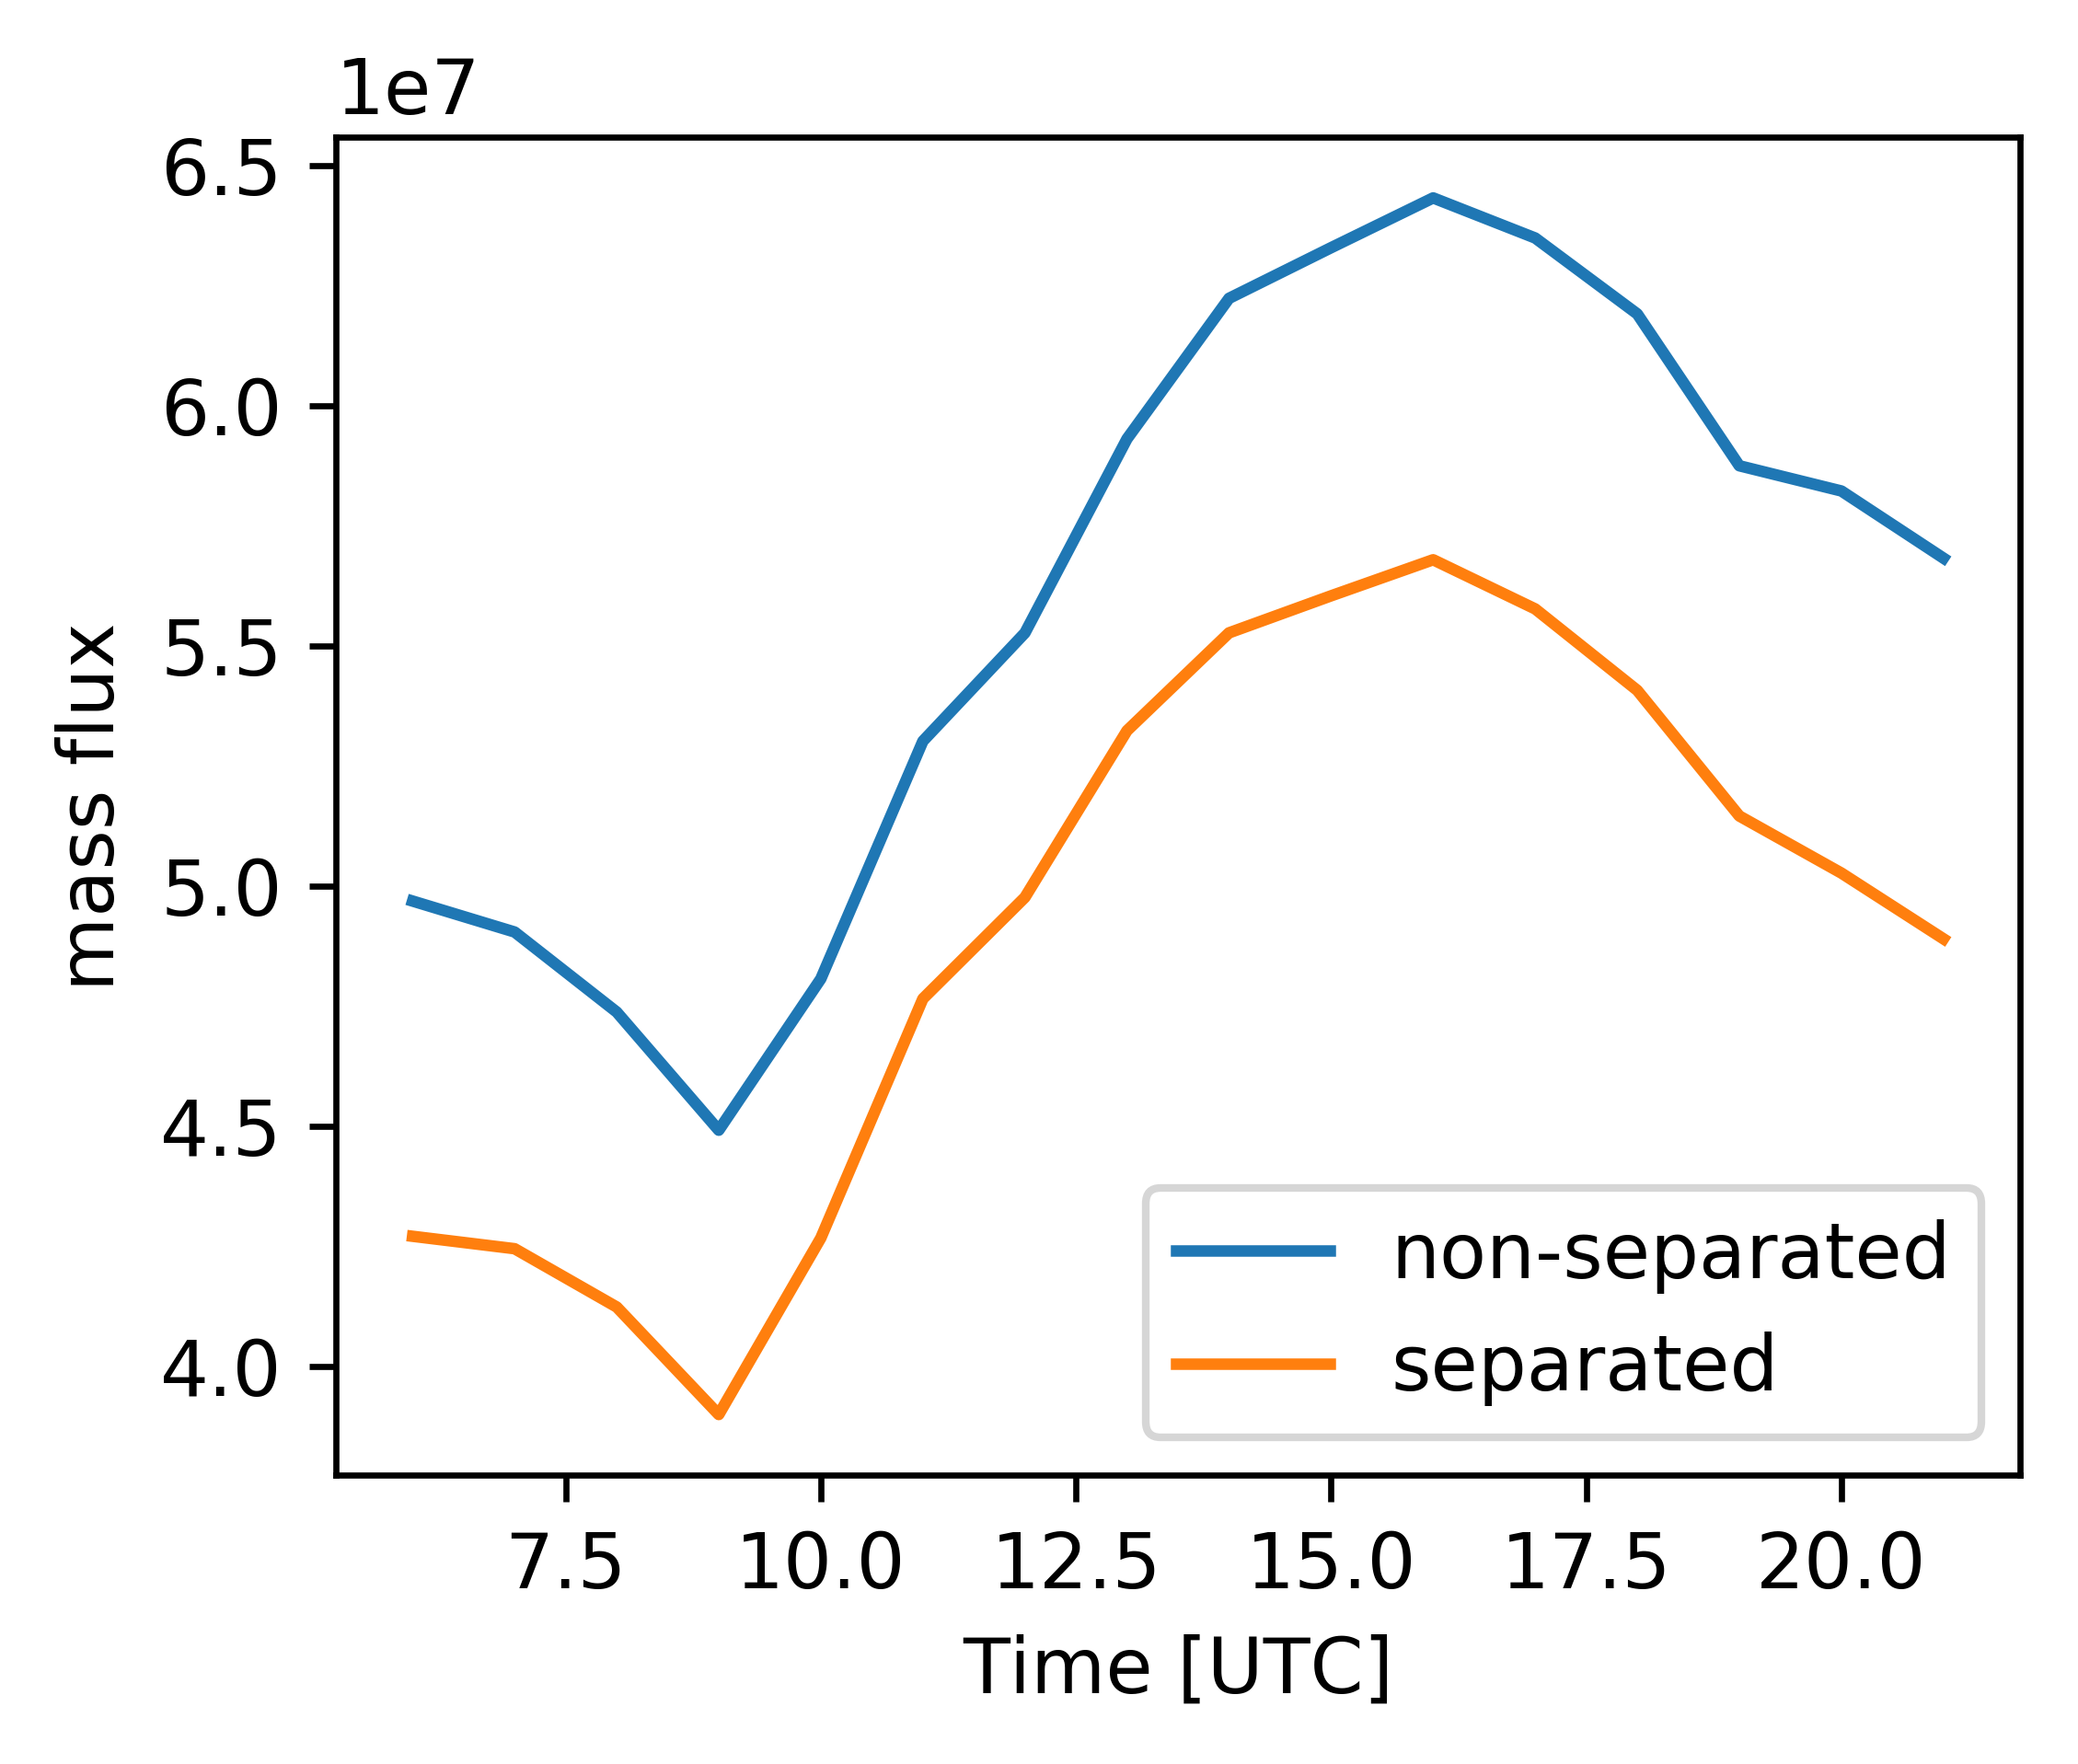

In [108]:
from IPython.display import Image
Image(filename = '/home/s/S.Rasp/repositories/convective_variability_analysis/figures/cloud_stats/m_evolution_all-days_50-mems_perim-3_dr-2_var-m_inc-1h_sum.png', width=500, height=500)